In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tag import CRFTagger
import pathlib
from docx import Document
import slate3k as slate

In [2]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]

In [3]:
def extract_text(suffix,file):
    if suffix == '.docx':
        doc = Document(file)
        for para in doc.paragraphs:
            return(para.text)
    elif suffix == '.txt':
        f = open(file, "r")
        return(f.read())
    elif suffix == '.pdf':
        with open(file,'rb') as f:
            extracted_text = slate.PDF(f)
            return(extracted_text)
    elif suffix == '.csv':
        df = pd.read_csv(file)
        return(df.to_string())

In [4]:
file = gui_fname()
file_type = pathlib.Path(file).suffix

In [7]:
print(file)

C:/Users/sugih/Documents/CODES/Text Mining/cobatext.txt


In [5]:
text = extract_text(file_type,file)

---
TOKENIZATION
---

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
print(text)

Sebagian masyarakat percaya bahwa tusuk jarum di daun telinga menjadi pertolongan pertama serangan stroke. Ternyata, informasi tersebut salah besar. Anda mungkin pernah membaca postingan di media sosial atau mengetahui informasi tentang metode tusuk jarum di daun telinga sebagai pertolongan pertama pada serangan stroke. Pesan ini bahkan terus berulang disebarkan dan masih saja banyak yang mempercayainya. Di dalam pesan tersebut dijelaskan bagaimana tindakan pertama yang harus dilakukan pada pasien stroke. Jika pasien jatuh seperti di kamar mandi atau kamar tidur, Anda diimbau untuk tidak memindahkannya ke manapun. Selanjutnya, Anda dianjurkan untuk mengambil jarum dan mensterilkannya kemudian menusukkannya pada jari-jari. Setelah itu, keluarkan darah korban setetes atau dua tetes. Masih menurut pesan tersebut, jika mulut pasien miring maka tarik kedua daun telinganya sampai merah dan langsung tusuk bagian bawah daun telinga dengan jarum steril sampai darah keluar kurang lebih 1-2 tetes

In [8]:
#Lower Case
text = text.lower()
LoweredText = word_tokenize(text)

In [9]:
#Remove Punctuation and Number
TokenizedText = [word for word in LoweredText if word.isalnum()]

In [10]:
print(TokenizedText)

['sebagian', 'masyarakat', 'percaya', 'bahwa', 'tusuk', 'jarum', 'di', 'daun', 'telinga', 'menjadi', 'pertolongan', 'pertama', 'serangan', 'stroke', 'ternyata', 'informasi', 'tersebut', 'salah', 'besar', 'anda', 'mungkin', 'pernah', 'membaca', 'postingan', 'di', 'media', 'sosial', 'atau', 'mengetahui', 'informasi', 'tentang', 'metode', 'tusuk', 'jarum', 'di', 'daun', 'telinga', 'sebagai', 'pertolongan', 'pertama', 'pada', 'serangan', 'stroke', 'pesan', 'ini', 'bahkan', 'terus', 'berulang', 'disebarkan', 'dan', 'masih', 'saja', 'banyak', 'yang', 'mempercayainya', 'di', 'dalam', 'pesan', 'tersebut', 'dijelaskan', 'bagaimana', 'tindakan', 'pertama', 'yang', 'harus', 'dilakukan', 'pada', 'pasien', 'stroke', 'jika', 'pasien', 'jatuh', 'seperti', 'di', 'kamar', 'mandi', 'atau', 'kamar', 'tidur', 'anda', 'diimbau', 'untuk', 'tidak', 'memindahkannya', 'ke', 'manapun', 'selanjutnya', 'anda', 'dianjurkan', 'untuk', 'mengambil', 'jarum', 'dan', 'mensterilkannya', 'kemudian', 'menusukkannya', 'pad

---
STEMMING
---

In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
StemmedText = []
for kata in TokenizedText:
    StemmedText.append(stemmer.stem(kata))
print(StemmedText)

['bagi', 'masyarakat', 'percaya', 'bahwa', 'tusuk', 'jarum', 'di', 'daun', 'telinga', 'jadi', 'tolong', 'pertama', 'serang', 'stroke', 'nyata', 'informasi', 'sebut', 'salah', 'besar', 'anda', 'mungkin', 'pernah', 'baca', 'postingan', 'di', 'media', 'sosial', 'atau', 'tahu', 'informasi', 'tentang', 'metode', 'tusuk', 'jarum', 'di', 'daun', 'telinga', 'bagai', 'tolong', 'pertama', 'pada', 'serang', 'stroke', 'pesan', 'ini', 'bahkan', 'terus', 'ulang', 'sebar', 'dan', 'masih', 'saja', 'banyak', 'yang', 'percaya', 'di', 'dalam', 'pesan', 'sebut', 'jelas', 'bagaimana', 'tindak', 'pertama', 'yang', 'harus', 'laku', 'pada', 'pasien', 'stroke', 'jika', 'pasien', 'jatuh', 'seperti', 'di', 'kamar', 'mandi', 'atau', 'kamar', 'tidur', 'anda', 'imbau', 'untuk', 'tidak', 'pindah', 'ke', 'mana', 'lanjut', 'anda', 'anjur', 'untuk', 'ambil', 'jarum', 'dan', 'steril', 'kemudian', 'tusuk', 'pada', 'telah', 'itu', 'keluar', 'darah', 'korban', 'tetes', 'atau', 'dua', 'tetes', 'masih', 'turut', 'pesan', 'se

In [12]:
print(len(StemmedText))

394


---
STOPWORD REMOVAL
---

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sugih\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
import gensim
stop_words = stopwords.words('indonesian')

In [14]:
CleanText = []
for token in StemmedText:
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
        CleanText.append(token)

In [15]:
print(CleanText)

['masyarakat', 'percaya', 'tusuk', 'jarum', 'daun', 'telinga', 'tolong', 'serang', 'stroke', 'nyata', 'informasi', 'salah', 'baca', 'postingan', 'media', 'sosial', 'informasi', 'metode', 'tusuk', 'jarum', 'daun', 'telinga', 'tolong', 'serang', 'stroke', 'pesan', 'ulang', 'sebar', 'percaya', 'pesan', 'tindak', 'laku', 'pasien', 'stroke', 'pasien', 'jatuh', 'kamar', 'mandi', 'kamar', 'tidur', 'imbau', 'pindah', 'anjur', 'ambil', 'jarum', 'steril', 'tusuk', 'darah', 'korban', 'tetes', 'tetes', 'pesan', 'mulut', 'pasien', 'miring', 'tarik', 'daun', 'telinga', 'merah', 'langsung', 'tusuk', 'daun', 'telinga', 'jarum', 'steril', 'darah', 'tetes', 'percaya', 'lancar', 'bantu', 'oksigen', 'masuk', 'tubuh', 'pasien', 'serang', 'stroke', 'pandang', 'medis', 'kait', 'informasi', 'tusuk', 'daun', 'telinga', 'jarum', 'serang', 'stroke', 'percaya', 'masyarakat', 'bukti', 'ilmiah', 'awat', 'evidence', 'based', 'saran', 'laku', 'pasien', 'stroke', 'informasi', 'enny', 'mulyatsih', 'kepala', 'bidang', '

In [16]:
print(len(CleanText))

222


---
POS TAGGING
---

In [17]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [18]:
PosTagged = ct.tag_sents([CleanText])
print(PosTagged)

[[('masyarakat', 'NN'), ('percaya', 'VB'), ('tusuk', 'VB'), ('jarum', 'NN'), ('daun', 'VB'), ('telinga', 'NN'), ('tolong', 'VB'), ('serang', 'NN'), ('stroke', 'NN'), ('nyata', 'JJ'), ('informasi', 'NN'), ('salah', 'JJ'), ('baca', 'VB'), ('postingan', 'NN'), ('media', 'NN'), ('sosial', 'JJ'), ('informasi', 'NN'), ('metode', 'NN'), ('tusuk', 'VB'), ('jarum', 'NN'), ('daun', 'VB'), ('telinga', 'NN'), ('tolong', 'VB'), ('serang', 'NN'), ('stroke', 'NN'), ('pesan', 'NN'), ('ulang', 'VB'), ('sebar', 'NN'), ('percaya', 'VB'), ('pesan', 'NN'), ('tindak', 'VB'), ('laku', 'NN'), ('pasien', 'NN'), ('stroke', 'NN'), ('pasien', 'NN'), ('jatuh', 'VB'), ('kamar', 'NN'), ('mandi', 'NN'), ('kamar', 'NN'), ('tidur', 'VB'), ('imbau', 'NN'), ('pindah', 'JJ'), ('anjur', 'NN'), ('ambil', 'VB'), ('jarum', 'NN'), ('steril', 'JJ'), ('tusuk', 'VB'), ('darah', 'NN'), ('korban', 'NN'), ('tetes', 'NN'), ('tetes', 'NN'), ('pesan', 'NN'), ('mulut', 'VB'), ('pasien', 'NN'), ('miring', 'NN'), ('tarik', 'NN'), ('daun',

In [19]:
WordBank = []
for word in PosTagged[0]:
    WordBank.append(word)

In [207]:
WordBank

[('masyarakat', 'NN'),
 ('percaya', 'VB'),
 ('tusuk', 'VB'),
 ('jarum', 'NN'),
 ('daun', 'VB'),
 ('telinga', 'NN'),
 ('tolong', 'VB'),
 ('serang', 'NN'),
 ('stroke', 'NN'),
 ('nyata', 'JJ'),
 ('informasi', 'NN'),
 ('salah', 'JJ'),
 ('baca', 'VB'),
 ('postingan', 'NN'),
 ('media', 'NN'),
 ('sosial', 'JJ'),
 ('informasi', 'NN'),
 ('metode', 'NN'),
 ('tusuk', 'VB'),
 ('jarum', 'NN'),
 ('daun', 'VB'),
 ('telinga', 'NN'),
 ('tolong', 'VB'),
 ('serang', 'NN'),
 ('stroke', 'NN'),
 ('pesan', 'NN'),
 ('ulang', 'VB'),
 ('sebar', 'NN'),
 ('percaya', 'VB'),
 ('pesan', 'NN'),
 ('tindak', 'VB'),
 ('laku', 'NN'),
 ('pasien', 'NN'),
 ('stroke', 'NN'),
 ('pasien', 'NN'),
 ('jatuh', 'VB'),
 ('kamar', 'NN'),
 ('mandi', 'NN'),
 ('kamar', 'NN'),
 ('tidur', 'VB'),
 ('imbau', 'NN'),
 ('pindah', 'JJ'),
 ('anjur', 'NN'),
 ('ambil', 'VB'),
 ('jarum', 'NN'),
 ('steril', 'JJ'),
 ('tusuk', 'VB'),
 ('darah', 'NN'),
 ('korban', 'NN'),
 ('tetes', 'NN'),
 ('tetes', 'NN'),
 ('pesan', 'NN'),
 ('mulut', 'VB'),
 ('pasien'

In [20]:
#JADIKAN DATAFRAME
df = pd.DataFrame(WordBank, columns=['Word','POS'])
df

,Word,POS
0,masyarakat,NN
1,percaya,VB
2,tusuk,VB
3,jarum,NN
4,daun,VB
...,...,...
217,tugas,NN
218,jalan,NN
219,masyarakat,NN
220,simpul,FW


In [21]:
#MENGHITUNG FREKUENSI KEMUNCULAN KATA
counts = df['POS'].value_counts()
print(counts)

NN     140
VB      42
FW      17
JJ      16
NEG      2
CD       1
RB       1
IN       1
NNP      1
SC       1
Name: POS, dtype: int64


In [22]:
#MENGHILANGKAN DATA BERULANG DAN MENAMBAHKAN FREKUENSI
word_count = pd.DataFrame(df.Word.value_counts().reset_index())
word_count.columns = ['Word', 'Frequency']
df.drop_duplicates("Word",inplace=True)
word_pos_count = pd.merge(df,word_count,on='Word')
word_pos_count

,Word,POS,Frequency
0,masyarakat,NN,3
1,percaya,VB,4
2,tusuk,VB,6
3,jarum,NN,6
4,daun,VB,6
...,...,...,...
119,polisi,NN,1
120,lintas,NN,1
121,madam,VB,1
122,bakar,NN,1


In [23]:
file = 'Penn-Treebank-POS-Tag.csv'
treebank = pd.read_csv(file)
treebank.drop(columns = 'Number', inplace=True)
treebank

,Tag,Description
0,CC,Konjungsi
1,CD,Kardinal
2,DT,Determiner/ Kata Penentu
3,EX,Existential there
4,FW,Foreign word / Kata Asing
5,IN,Preposisi
6,JJ,Adjective
7,JJR,"Adjective, comparative"
8,JJS,"Adjective, superlative"
9,LS,List item marker


In [34]:
value = treebank["Description"].to_list()
key = treebank['Tag'].to_list()

{<zip object at 0x00000138B6FE1A88>}


In [38]:
pos_dict = {}
values = treebank["Description"].to_list()
keys = treebank['Tag'].to_list()
for key in keys:
    for value in values:
        pos_dict[key] = value
        values.remove(value)
        break  

In [56]:
keterangan = []
for pos in word_pos_count['POS']:
    if pos in pos_dict.keys():
        keterangan.append(pos_dict[pos])
    else:
        keterangan.append("Tidak Diketahui")
word_pos_count['Keterangan'] = keterangan
word_pos_count.sort_values('Frequency',ascending=False,ignore_index=True,inplace=True)
word_pos_count

,Word,POS,Frequency,Keterangan
0,stroke,NN,12,Noun Sigular / Kata Benda Singular
1,pasien,NN,8,Noun Sigular / Kata Benda Singular
2,serang,NN,7,Noun Sigular / Kata Benda Singular
3,tusuk,VB,6,"Verb, base form / kata kerja dasar"
4,jarum,NN,6,Noun Sigular / Kata Benda Singular
...,...,...,...,...
119,derajat,NN,1,Noun Sigular / Kata Benda Singular
120,jaga,NN,1,Noun Sigular / Kata Benda Singular
121,mmpu,JJ,1,Adjective
122,centre,FW,1,Foreign word / Kata Asing


In [ ]:
keterangan = []
for kata in word_pos_count['POS']:
    if kata == 'NN':
        keterangan.append("Kata Benda (Noun)")
    elif kata == 'VB':
        keterangan.append("Kata Keja (Verb)")
    elif kata == 'JJ':
        keterangan.append("Kata Sifat (Adjective)")
    elif kata == 'FW':
        keterangan.append("Kata Asing (Foreign Word)")
    elif kata == 'VB':
        keterangan.append("Kata Keja (Verb)")
    elif kata == 'IN':
        keterangan.append("Preposisi")
    elif kata == 'CD':
        keterangan.append("Cardinal")
    elif kata == 'SC':
        keterangan.append("Kata Keja (Verb)")

---
WORDCLOUD
---

In [58]:
from wordcloud import WordCloud
cloud = " ".join(CleanText)
wordCloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(cloud)

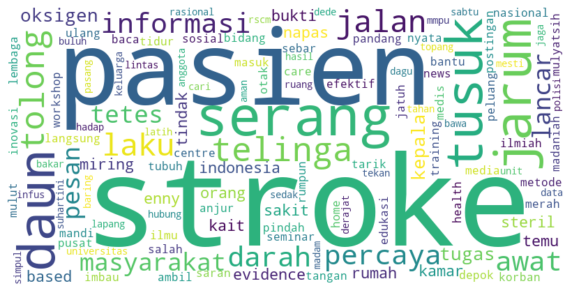

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
TRAIN
---

In [26]:
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask
corpus = NLPTaskDataFetcher.load_corpus(NLPTask.UD_INDONESIAN)

C:\Users\sugih\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) load_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  


2021-11-02 14:54:55,134 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-dev.conllu not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmpyxc0ccqq


971025B [00:00, 9191877.93B/s]                                                                                         

2021-11-02 14:54:55,338 copying C:\Users\sugih\AppData\Local\Temp\tmpyxc0ccqq to cache at C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-dev.conllu
2021-11-02 14:54:55,341 removing temp file C:\Users\sugih\AppData\Local\Temp\tmpyxc0ccqq


2021-11-02 14:54:55,878 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-test.conllu not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmpqjmp_57x


906905B [00:00, 14397832.17B/s]                                                                                        

2021-11-02 14:54:56,029 copying C:\Users\sugih\AppData\Local\Temp\tmpqjmp_57x to cache at C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-test.conllu
2021-11-02 14:54:56,033 removing temp file C:\Users\sugih\AppData\Local\Temp\tmpqjmp_57x


2021-11-02 14:54:57,232 https://raw.githubusercontent.com/UniversalDependencies/UD_Indonesian-GSD/master/id_gsd-ud-train.conllu not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmp3_kd0jw0


7527224B [00:00, 15565911.07B/s]                                                                                       

2021-11-02 14:54:57,813 copying C:\Users\sugih\AppData\Local\Temp\tmp3_kd0jw0 to cache at C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-train.conllu


2021-11-02 14:54:57,825 removing temp file C:\Users\sugih\AppData\Local\Temp\tmp3_kd0jw0
2021-11-02 14:54:57,828 Reading data from C:\Users\sugih\.flair\datasets\ud_indonesian
2021-11-02 14:54:57,829 Train: C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-train.conllu
2021-11-02 14:54:57,829 Dev: C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-dev.conllu
2021-11-02 14:54:57,830 Test: C:\Users\sugih\.flair\datasets\ud_indonesian\id_gsd-ud-test.conllu


In [28]:
tag_type = 'upos'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

In [32]:
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, BertEmbeddings
from typing import List
embedding_types: List[TokenEmbeddings] = [
 WordEmbeddings('id-crawl'),
 WordEmbeddings('id'),]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

2021-11-02 14:57:20,712 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M.vectors.npy not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmpccwvktd7


100%|██████████████████████████████████████████████████████████████| 1199998928/1199998928 [18:47<00:00, 1064534.98B/s]

2021-11-02 15:16:08,660 copying C:\Users\sugih\AppData\Local\Temp\tmpccwvktd7 to cache at C:\Users\sugih\.flair\embeddings\id-crawl-fasttext-300d-1M.vectors.npy


2021-11-02 15:16:13,372 removing temp file C:\Users\sugih\AppData\Local\Temp\tmpccwvktd7
2021-11-02 15:16:14,085 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-crawl-fasttext-300d-1M not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmp5e4no_ot


100%|███████████████████████████████████████████████████████████████████| 39636845/39636845 [01:18<00:00, 503731.84B/s]

2021-11-02 15:17:33,937 copying C:\Users\sugih\AppData\Local\Temp\tmp5e4no_ot to cache at C:\Users\sugih\.flair\embeddings\id-crawl-fasttext-300d-1M
2021-11-02 15:17:34,000 removing temp file C:\Users\sugih\AppData\Local\Temp\tmp5e4no_ot


2021-11-02 15:17:43,584 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmpii5aaii8


100%|█████████████████████████████████████████████████████████████████| 360822128/360822128 [06:23<00:00, 941540.85B/s]

2021-11-02 15:24:07,658 copying C:\Users\sugih\AppData\Local\Temp\tmpii5aaii8 to cache at C:\Users\sugih\.flair\embeddings\id-wiki-fasttext-300d-1M.vectors.npy


2021-11-02 15:24:08,717 removing temp file C:\Users\sugih\AppData\Local\Temp\tmpii5aaii8
2021-11-02 15:24:09,386 https://flair.informatik.hu-berlin.de/resources/embeddings/token/id-wiki-fasttext-300d-1M not found in cache, downloading to C:\Users\sugih\AppData\Local\Temp\tmpsutioq9j


100%|██████████████████████████████████████████████████████████████████| 11638719/11638719 [00:08<00:00, 1444044.33B/s]

2021-11-02 15:24:18,152 copying C:\Users\sugih\AppData\Local\Temp\tmpsutioq9j to cache at C:\Users\sugih\.flair\embeddings\id-wiki-fasttext-300d-1M
2021-11-02 15:24:18,172 removing temp file C:\Users\sugih\AppData\Local\Temp\tmpsutioq9j


In [72]:
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [73]:
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('resources/taggers/Indonesia-POS-TAG-Sugih',
 learning_rate=0.1,
 mini_batch_size=32,
 max_epochs=10)

2021-11-02 16:13:14,553 ----------------------------------------------------------------------------------------------------
2021-11-02 16:13:14,568 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('id-crawl')
    (list_embedding_1): WordEmbeddings('id')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=600, out_features=600, bias=True)
  (rnn): LSTM(600, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=19, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-11-02 16:13:14,570 ----------------------------------------------------------------------------------------------------
2021-11-02 16:13:14,571 Corpus: "Corpus: 4477 train + 559 dev + 557 test sentences"
2021-11-02 16:13:14,572 ----------------------------------------------------------------------------------------------------
2021-11-02 16:13:14,573 

2021-11-02 16:24:52,730 epoch 5 - iter 42/140 - loss 0.46721888 - samples/sec: 47.43 - lr: 0.100000
2021-11-02 16:25:03,459 epoch 5 - iter 56/140 - loss 0.45788992 - samples/sec: 41.85 - lr: 0.100000
2021-11-02 16:25:12,947 epoch 5 - iter 70/140 - loss 0.45909691 - samples/sec: 47.31 - lr: 0.100000
2021-11-02 16:25:23,522 epoch 5 - iter 84/140 - loss 0.45974123 - samples/sec: 42.41 - lr: 0.100000
2021-11-02 16:25:34,623 epoch 5 - iter 98/140 - loss 0.45866679 - samples/sec: 40.39 - lr: 0.100000
2021-11-02 16:25:46,196 epoch 5 - iter 112/140 - loss 0.46099342 - samples/sec: 38.72 - lr: 0.100000
2021-11-02 16:25:57,619 epoch 5 - iter 126/140 - loss 0.45824915 - samples/sec: 39.23 - lr: 0.100000
2021-11-02 16:26:06,996 epoch 5 - iter 140/140 - loss 0.45694669 - samples/sec: 47.79 - lr: 0.100000
2021-11-02 16:26:06,997 ----------------------------------------------------------------------------------------------------
2021-11-02 16:26:06,999 EPOCH 5 done: loss 0.4569 - lr 0.1000000
2021-11

2021-11-02 16:36:35,067 EPOCH 10 done: loss 0.3917 - lr 0.1000000
2021-11-02 16:36:45,040 DEV : loss 0.25866127014160156 - f1-score (micro avg)  0.9164
2021-11-02 16:36:45,078 BAD EPOCHS (no improvement): 0
2021-11-02 16:36:45,079 saving best model
2021-11-02 16:37:52,946 ----------------------------------------------------------------------------------------------------
2021-11-02 16:37:53,041 loading file resources\taggers\Indonesia-POS-TAG-Sugih\best-model.pt
2021-11-02 16:38:16,911 0.9217	0.9217	0.9217	0.9217
2021-11-02 16:38:16,935 
Results:
- F-score (micro) 0.9217
- F-score (macro) 0.8522
- Accuracy 0.9217

By class:
              precision    recall  f1-score   support

        NOUN     0.8892    0.8907    0.8900      2488
       PROPN     0.9018    0.9361    0.9186      2207
       PUNCT     0.9946    0.9994    0.9970      1645
        VERB     0.9405    0.9360    0.9383      1250
         ADP     0.9517    0.9575    0.9546      1153
         ADV     0.8039    0.8501    0.8263

{'test_score': 0.9217002237136466,
 'dev_score_history': [0.8005451338784673,
  0.8779060445727113,
  0.8965047298380632,
  0.9047619047619048,
  0.903639570306237,
  0.9098925765592433,
  0.9076479076479076,
  0.9152637485970819,
  0.9143819143819144,
  0.9163860830527497],
 'train_loss_history': [1.3493059707786306,
  0.6492959942491263,
  0.5315836698717235,
  0.480882413185785,
  0.45694668545416306,
  0.4378588506296619,
  0.42165776535582156,
  0.4123970654441105,
  0.40134709479741226,
  0.39172361557450436],
 'dev_loss_history': [tensor(0.6152),
  tensor(0.3786),
  tensor(0.3280),
  tensor(0.2998),
  tensor(0.2932),
  tensor(0.2781),
  tensor(0.2822),
  tensor(0.2648),
  tensor(0.2637),
  tensor(0.2587)]}

In [75]:
from flair.data import Sentence
sentence = Sentence(cloud)
tag_pos = SequenceTagger.load('resources/taggers/Indonesia-POS-TAG-Sugih/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2021-11-02 18:11:25,058 loading file resources/taggers/Indonesia-POS-TAG-Sugih/best-model.pt
masyarakat <NOUN> percaya <VERB> tusuk <NOUN> jarum <NOUN> daun <NOUN> telinga <NOUN> tolong <VERB> serang <NOUN> stroke <NOUN> nyata <ADJ> informasi <NOUN> salah <DET> baca <NOUN> postingan <NOUN> media <NOUN> sosial <NOUN> informasi <NOUN> metode <NOUN> tusuk <NOUN> jarum <NOUN> daun <NOUN> telinga <NOUN> tolong <VERB> serang <NOUN> stroke <NOUN> pesan <NOUN> ulang <NOUN> sebar <NOUN> percaya <VERB> pesan <NOUN> tindak <NOUN> laku <NOUN> pasien <NOUN> stroke <NOUN> pasien <NOUN> jatuh <VERB> kamar <NOUN> mandi <NOUN> kamar <NOUN> tidur <NOUN> imbau <ADP> pindah <VERB> anjur <ADP> ambil <VERB> jarum <NOUN> steril <NOUN> tusuk <NOUN> darah <NOUN> korban <NOUN> tetes <NOUN> tetes <NOUN> pesan <NOUN> mulut <NOUN> pasien <NOUN> miring <ADJ> tarik <NOUN> daun <NOUN> telinga <NOUN> merah <ADJ> langsung <ADP> tusuk <NOUN> daun <NOUN> telinga <NOUN> jarum <NOUN> steril <NOUN> darah <NOUN> tetes <NOUN>

In [61]:
import session_info
session_info.show()